# Выбор локации для скважины

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Также необходимо проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

В отдельном блоке импортируем необходимые библиотеки и модели машинного обучения.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

Откроем файлы, содержащие информацию о месторождениях.

In [3]:
try:
    df_1 = pd.read_csv('geo_data_0.csv')
except:
    df_1 = pd.read_csv('/geo_data_0.csv')
try:
    df_2 = pd.read_csv('geo_data_1.csv')
except:
    df_2 = pd.read_csv('/geo_data_1.csv')
try:
    df_3 = pd.read_csv('geo_data_2.csv')
except:
    df_3 = pd.read_csv('/geo_data_2.csv')

Отобразим информацию, необходимую для первичной оценки данных.

Регион 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
            id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99990            NaN            NaN            NaN            NaN
top      AGS9W            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       0.500419       0.250143       2.502647      92.500000
std        NaN       0.871832       0.504433       3.248248      44.288691
min        NaN      -1.40

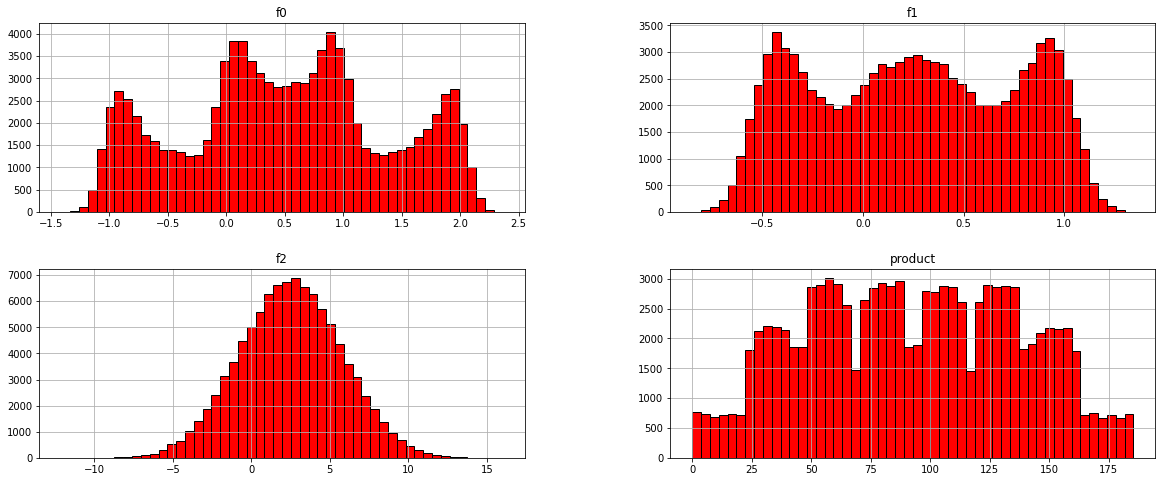

####################################################################################################
Регион 2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
            id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99996            NaN            NaN            NaN            NaN
top      wt4Uk            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       1.141296      -4.796579       2.494541      68.825000

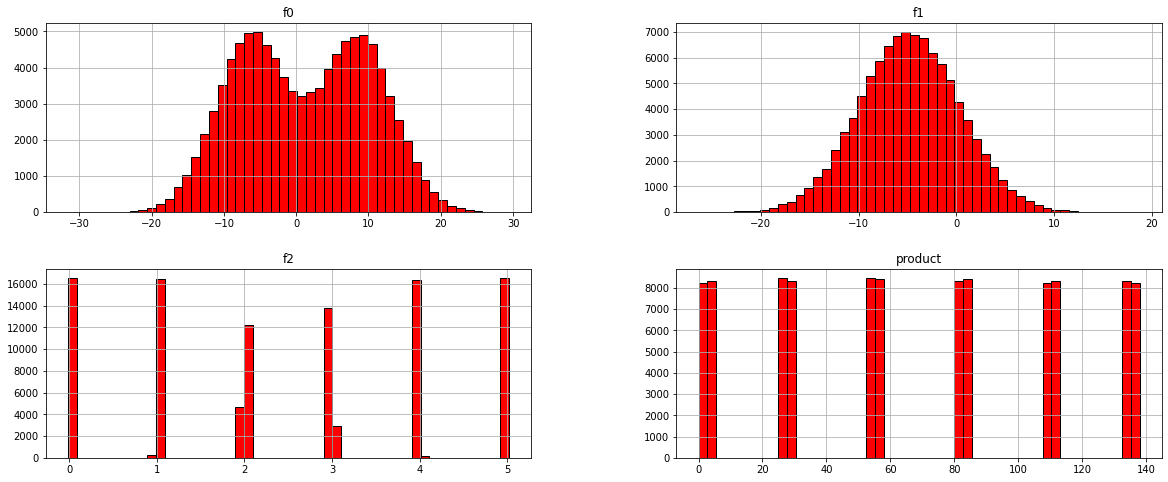

####################################################################################################
Регион 3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
            id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99996            NaN            NaN            NaN            NaN
top      xCHr8            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       0.002023      -0.002081       2.495128      95.000000

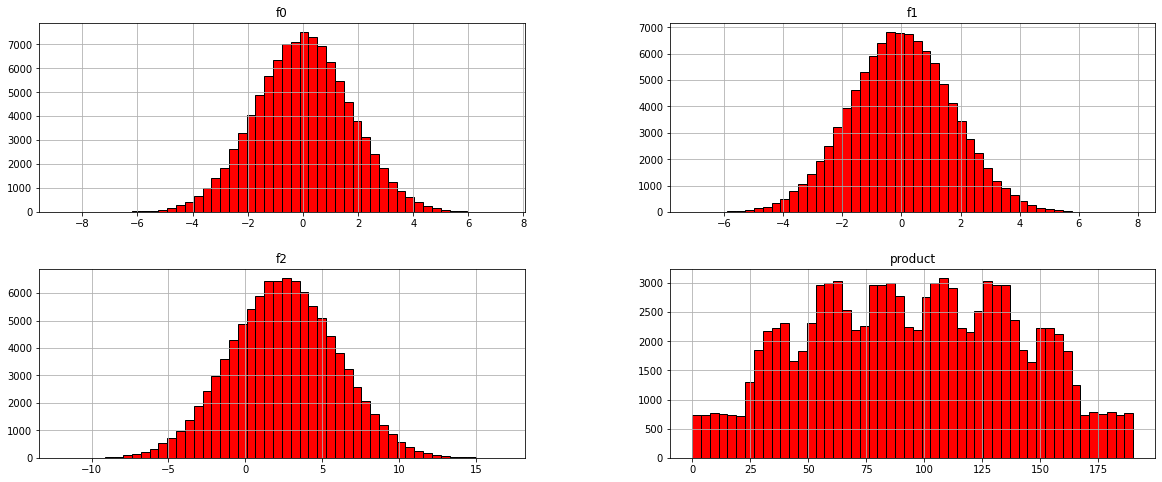

####################################################################################################


In [4]:
i = 1
for data in [df_1, df_2, df_3]:
    print('Регион', i)
    print('\n')
    print(data.info())
    print(data.describe(include='all'))
    data.hist(bins=50, figsize=(20,8), color='r', edgecolor='black', linewidth=1)
    plt.show()
    print('#'*100)
    i += 1

Также выведем на экран значение коэффициента корреляции Пирсона между признаками во всех трех датасетах.

In [5]:
i = 1
for data in [df_1, df_2, df_3]:
    print('Регион', i)
    print(data.corr())
    print('#'*100)
    i += 1

Регион 1
               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
####################################################################################################
Регион 2
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
####################################################################################################
Регион 3
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000
###################################################

### Выводы
* <b> Регион 1 </b>

   В датафрейме содержится информация о 100000 скважин. id 5 скважин встречаются по 2 раза. Пропусков данных нет. Признаки f0 и f1 распределены с несколькими вершинами, а признак f2- нормально. Объем запасов скважин в регионе 1 составляет от 0 до 185,4 тысяч баррелей. Средний объем запасов в регионе- 92,5 тысячи баррелей. Распределение объемов по скважинам также имеет много вершин и в интервале от 25 до 160 тысяч имеет распределение, близкое к равномерному.
   

* <b> Регион 2 </b>

   В датафрейме содержится информация о 100000 скважин. id 2 скважин встречаются по 2 раза. Пропусков данных нет. Признак f0 распределен биномиально, f1- нормально, а распределение признака f2 носит вид, близкий к дискретному. Распределение целевого признака также носит дискретный характер и равномерно во всем интервале значений от 0 до 137,9 тысяч баррелей. Средний объем запасов скважин в регионе составляет 68,8 тысяч баррелей.
   
   
* <b> Регион 3 </b>
   
   В датафрейме содержится информация о 100000 скважин. id двух скважин встречаются по 2 раза. Пропусков в данных нет. Признаки распределены нормально. Распределение целевого признака имеет несколько вершин в интервале значений от 0 до 190 тысяч баррелей. Средний объем запасов скважин в регионе составляет 95 тысяч баррелей.
   
В целом необходимо отметить, что интервалы значений всех оцениваемых признаков различны во всех датасетах, поэтому для каждого из датафреймов необходимо обучать отдельную модель. Коэффициент корреляции Пирсона показывает линейную зависимость объемов запаса нефти в регионе 2 и слабую зависимость объемов запаса от признаков f0 и f1 в разной степени во всех регионах.

## Обучение и проверка модели

Создадим функцию, принимающую на входе датафрейм и возвращающую значение среднеквадратичной ошибки. В теле функции циклом определим наилучшее значение среднеквадратичной ошибки и соответствующие ей гиперпараметры линейной регрессии.

In [6]:
def linear_regression(data):
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                                  target,
                                                                                  test_size=0.25,
                                                                                  random_state=12345
                                                                                 )
    model = LinearRegression(normalize=True, n_jobs=-1)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions)**0.5
    print(f'Средний предсказанный объем запасов: {predictions.mean(): .2f}')
    print(f'Cреднеквадратичная ошибка: {rmse: .2f}')
    return predictions, target_valid.reset_index(drop=True)

print('В регионе 1')
df_1_predictions, df_1_target = linear_regression(df_1)
print('\nВ регионе 2')
df_2_predictions, df_2_target = linear_regression(df_2)
print('\nВ регионе 3')
df_3_predictions, df_3_target = linear_regression(df_3)

В регионе 1
Средний предсказанный объем запасов:  92.59
Cреднеквадратичная ошибка:  37.58

В регионе 2
Средний предсказанный объем запасов:  68.73
Cреднеквадратичная ошибка:  0.89

В регионе 3
Средний предсказанный объем запасов:  94.97
Cреднеквадратичная ошибка:  40.03


Проверим модели на адекватность. Для этого выведем значения среднеквадратичной ошибки для константной модели, содержащей средние значения объема запасов нефти в регионе.

In [7]:
i = 1
for data in [df_1, df_2, df_3]:
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                                  target,
                                                                                  test_size=0.25,
                                                                                  random_state=12345
                                                                                 )
    model = DummyRegressor(strategy='mean')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = rmse = mean_squared_error(target_valid, predictions)**0.5
    print(f'В регионе {i} значение среднеквадратичной ошибки на константной модели составляет {rmse: .1f}')
    print('='*100)
    i += 1

В регионе 1 значение среднеквадратичной ошибки на константной модели составляет  44.3
В регионе 2 значение среднеквадратичной ошибки на константной модели составляет  46.0
В регионе 3 значение среднеквадратичной ошибки на константной модели составляет  44.9


### Вывод

В результате обучения модели и предсказания результатов видим, что наилучшие результаты показывает модель, обученная на датасете второго региона- среднеквадратичная ошибка составляет всего 0,89. Это можно объяснить практически линейной зависимостью целевого признака с признаком f2. Модели, обученные на датасетах регионов 1 и 3, показывают довольно большое значение среднеквадратичной ошибки. В целом модели адекватны, так как показывают значение среднеквадратичной ошибки ниже, чем на константной модели. В следующем разделе создадим константы ключевых значений, необходимых для расета прибыли и рисков.

## Подготовка к расчёту прибыли

В данном разделе создадим необходимые для расчета прибыли и рисков константы и зададим их количественные значения. Согласно условиям проекта в регионе случайным образом выбирают 500 скважин и определяют на основе обученной модели предполагаемый запас объемов нефти в них, после чего отбирают 200 наиболее производительных скважины и производят их бурение. Объем нефти в приложенных к проекту датасетах указан в тысячах баррелей, а стоимость одного барреля составляет 450 рублей. Бюджет, выделенный на бурение 200 скважин составляет 10 миллиардов рублей. Создадим переменные, содержащую перечисленные константы, напишем функцию, определяющую прибыль в каждом регионе и вычислим необходимый средний объем запасов, достаточный для разработки. 

In [8]:
boreholes = 500
selection = 200
barrel_cost = 450
budget = 10000000000

# напишем функцию, принимающую на вход предсказания модели и возвращающую предполагаемую прибыль
def profit_calc(predictions, target):
    target = pd.Series(target)
    predictions = pd.Series(predictions)
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:selection]
    return selected.sum() * 450 * 1000 - budget

# выведем на экран минимальный средний объем запасов в регионе, достаточный для разработки

min_volume = budget /(barrel_cost * 1000 * selection)
print(f'Необходимый средний объем запасов для разработки составляет {min_volume: .1f} тыс. куб. метров')

Необходимый средний объем запасов для разработки составляет  111.1 тыс. куб. метров


### Вывод

В данном разделе создали необходимые константы и написали функцию, определяющую прибыль в 200 лучших скважин из выборки. Дополнительно рассчитали необходимый средний объем запасов в скважинах, позволяющий избежать убытков при разработке месторождений. Видим, что средний объем запасов во всех трех регионах значительно меньше необходимого, поэтому для получения прибыли при разработке скважин необходимо выбрать те, в которых предполагаемый объем запасов выше среднего по региону.

## Расчёт прибыли и рисков 

In [9]:
def profit_risk(data, target):
    data = pd.Series(data)
    calculations = []
    for i in range(1000):
        subsample = data.sample(n=boreholes, replace=False)
        calculations.append(profit_calc(subsample, target))
    calculations = pd.Series(calculations)
    conf_interval = st.t.interval(0.95, len(calculations)-1, calculations.mean(), calculations.sem())
    print('95%-ый доверительный интервал', conf_interval)
    print(f'Средняя прибыль {calculations.mean() / 10**9: .2f} млрд. рублей')
    print(f'Риск убытков составляет {len(calculations[calculations<0]) / len(calculations): .1%}')
    return calculations

print('В регионе 1')
df_1_result = profit_risk(df_1_predictions, df_1_target)

print('\nВ регионе 2')
df_2_result = profit_risk(df_2_predictions, df_2_target)

print('\nВ регионе 3')
df_3_result = profit_risk(df_3_predictions, df_3_target)

В регионе 1
95%-ый доверительный интервал (370380768.86598694, 403792391.62896526)
Средняя прибыль  0.39 млрд. рублей
Риск убытков составляет  8.5%

В регионе 2
95%-ый доверительный интервал (438141478.00463927, 463280218.1868446)
Средняя прибыль  0.45 млрд. рублей
Риск убытков составляет  1.4%

В регионе 3
95%-ый доверительный интервал (371772475.57009155, 405350434.9094648)
Средняя прибыль  0.39 млрд. рублей
Риск убытков составляет  7.0%


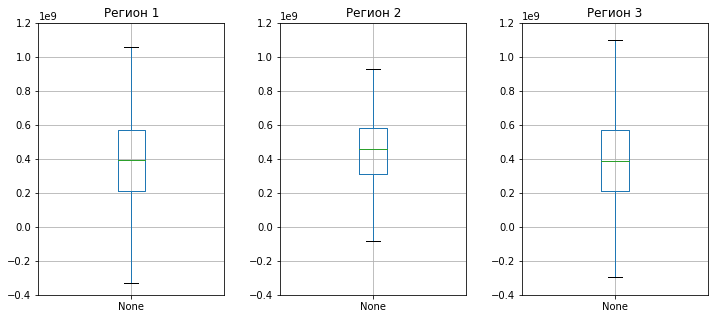

In [10]:
grid = plt.GridSpec(1, 3, wspace=0.3)
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[0, 2])

kwargs = {'kind': 'box', 'figsize': (12, 5), 'ylim': (-400000000, 1200000000), 'showfliers': False, 'grid': True}
df_1_result.plot(ax=ax1, title='Регион 1', **kwargs)
df_2_result.plot(ax=ax2, title='Регион 2', **kwargs)
df_3_result.plot(ax=ax3, title='Регион 3', **kwargs)

plt.show()

## Вывод

В данном проекте произвели прибыли от разработки нефтедобывающих скважин в трех различных регионах на основании предсказаний модели машинного обучения. 
 
При ознакомлении с данными обнаружили, чтообучающие признаки имеют различные интервалы значений и разное распределение во всех трех регионах. Во втором регионе наблюдается линейная зависимость объемов запаса нефти с одним из обучающим признаков. По этой причине для каждого региона пришлось обучать отдельно модель линейной регрессии.

Бюджет на разработку скважин составляет 10 милилардов рублей. Для безубыточного производства необходимо, чтобы в среднем объем запасов в 200 скважинах составлял не менее 111,1 тысяч кубических метров нефти. Это больше, чем средний объем запасов в разведочных скважинах всех трех регионов. Наименьший средний запас во втором регионе- 68,8 тысяч баррелей. Наибольший средний запас в третьем регионе- 95 тысяч баррелей.

Техникой бутстрэп отобрали по 500 случайных скважин и в лучших 200 из них получили значение прибыли для 1000 различных выборок для трех регионов. По результатам расчета видим, что прибыль во всех трех регионах составляет около 400 миллионов рублей. При этом максимальная прибыль во втором регионе- 450 миллионов рублей. Несмотря на то, что в среднем в нем объем запасов наименьший из всех регионов, модель, обученная на данных из него, предсказывает гораздо лучше моделей, обученных на данных из первого и третьего регионов. Это можно объяснить очень сильной корреляцией целевого признака с одним из обучающих. Риски убытков минимальны также во втором регионе и составляют около 1%.

<b>Окончательно выберем второй регион, так как в нем, несмотря на меньший объем запасов, гораздо ниже риски убытков и выше средняя прибыль. Стоит отметить, что средняя прибыль во втором регионе на уровне с первым и третьим регионами обусловлена, скорее всего, плохой предсказательной способностью моделей, обученных на данных первого и третьего региона. Это означает, что в первом и третьем регионе, возможно, стоит рассмотреть другие признаки для обучения моделей, чтобы повысить их эффективность.</b>